# Car Sale: PreProcessing And Exploratory Data Analysis


# Importing necessary libraries  



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd



# Reading the Dataset


In [7]:
df = pd.read_csv('car_data.csv')

# Data Pre-Processing

In [8]:
df.head(3)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai


In [9]:
df.tail()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1031,1031,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Jagdalpur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [10]:
df.columns

Index(['Unnamed: 0', 'Name', 'Label', 'Location', 'Price', 'Kms_driven',
       'Fuel_type', 'Owner', 'Year', 'Company'],
      dtype='object')

So our dataset has an unneccessary **Unnamed: 0** column which needs to be dropped.
Also, the Owner column has Nan Values so we need to handle the missing data.

In [11]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [12]:
df.head(3)

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai


#### So our unnamed column is dropped

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1032 non-null   object
 1   Label       1032 non-null   object
 2   Location    1030 non-null   object
 3   Price       1032 non-null   object
 4   Kms_driven  1032 non-null   object
 5   Fuel_type   1032 non-null   object
 6   Owner       740 non-null    object
 7   Year        1032 non-null   int64 
 8   Company     1032 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.7+ KB


Except for the **Year** column, all the other columns are of **object** type so we first need to fix that.

In [14]:
df.describe()

,Year
count,1032.000000
mean,2015.810078
std,3.396920
min,2000.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2022.000000


Our ***Location*** column has **2** missing values and our ***Owner*** column has **292** missing values.

# Data Preparation
## Data Inconsistencies
### Price Column Pre-Processing


In [15]:
df['Price'].min()

'Ask For Price'

In [16]:
df['Price'].max()

'₹97,000'

So aparently our Price column has this ***Ask For Price*** value and we need to get rid of it.

In [17]:
df[df['Price'] =='Ask For Price']
indexes = df[df['Price'] =='Ask For Price'].index

Dropping these rows as we need the price for making predictions.

Also **4** of these have missing owner so that also reduces our filling task

In [18]:
df = df.drop(indexes)

In [19]:
df[df['Price'] =='Ask For Price']

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company


Now all our Price data is numeric. ie, No price row is holding "ask for price" data

In [20]:
df['Price'].min(),df['Price'].max()

('₹1,19,000', '₹97,000')

So our price column is of Object because of the Rupee sign at the start.

So let's remove that rupee sign and also remove the **,** and finally convert it to integer.

In [21]:
remove_rupe = lambda a:a[1:].replace(',','')
int(remove_rupe('₹1,19,000'))

119000

As we can see that our lambda function worked so let's apply it to the Price column and check

In [22]:
df['Price'] = df['Price'].apply(remove_rupe)
df['Price'] = pd.to_numeric(df['Price'])

In [23]:
df.head(3)

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,"35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,"44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,"42,917 kms",Petrol,NaN,2018,Hyundai


In [24]:
df['Price'].min() , df['Price'].max()

(39000, 7500000)

In [25]:
df.astype({'Price': 'int32'}).dtypes

Name          object
Label         object
Location      object
Price          int32
Kms_driven    object
Fuel_type     object
Owner         object
Year           int64
Company       object
dtype: object

In [26]:
df.describe()

,Price,Year
count,1.026000e+03,1026.000000
mean,6.857131e+05,2015.809942
std,5.374755e+05,3.403289
min,3.900000e+04,2000.000000
25%,4.104990e+05,2014.000000
50%,5.576990e+05,2016.000000
75%,7.885990e+05,2018.000000
max,7.500000e+06,2022.000000


So now our **Price** column is fixed.

Time to fix our **Kms_Driven** Column

## Kms_driven Column Pre-Processing


In [27]:
df['Kms_driven']

0       35,056 kms 
1       44,000 kms 
2       42,917 kms 
3       16,112 kms 
4       30,988 kms 
           ...     
1027    65,000 kms 
1028    60,000 kms 
1029    31,000 kms 
1030    31,000 kms 
1031    31,000 kms 
Name: Kms_driven, Length: 1026, dtype: object

Because of the kms at the end, it is also of object.

First let's ensure all the rows have **kms** at end. If so , we will slice that part off and type case rest of the data.

Also we need to remove those **,**

In [28]:
remove_kms = lambda a:a[:-4].replace(',','')
int(remove_kms('31,000 kms'))

31000

In [29]:
df['Kms_driven'] = df['Kms_driven'].apply(remove_kms)
df['Kms_driven'] = pd.to_numeric(df['Kms_driven'])

In [30]:
df.head(3)

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,35056,Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,44000,Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,42917,Petrol,NaN,2018,Hyundai


In [31]:
df.astype({'Kms_driven': 'int32'}).dtypes

Name          object
Label         object
Location      object
Price          int64
Kms_driven     int32
Fuel_type     object
Owner         object
Year           int64
Company       object
dtype: object

In [32]:
df.describe()

,Price,Kms_driven,Year
count,1.026000e+03,1026.000000,1026.000000
mean,6.857131e+05,50299.542885,2015.809942
std,5.374755e+05,38143.114092,3.403289
min,3.900000e+04,0.000000,2000.000000
25%,4.104990e+05,26228.750000,2014.000000
50%,5.576990e+05,44000.000000,2016.000000
75%,7.885990e+05,67551.000000,2018.000000
max,7.500000e+06,690000.000000,2022.000000


Now our **Kms_driven** column is also cleaned.

Time to handle the missing data

# Finding and Handling Missing Data



In [33]:
df[df['Owner'].isna()]

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,35056,Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,44000,Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,42917,Petrol,NaN,2018,Hyundai
8,Honda Amaze - 2013,PLATINUM,Pune,393699,44940,Petrol,NaN,2013,Honda
16,Toyota Innova 2.5 VX BS III 7 STR - 2012,GOLD,Bangalore,1025000,131000,Diesel,NaN,2012,Toyota
...,...,...,...,...,...,...,...,...,...
1007,Maruti Suzuki Alto Std BS IV - 2007,GOLD,Bangalore,88000,85000,Petrol,NaN,2007,Maruti
1024,Mahindra Xylo D2 BS IV - 2009,GOLD,Trichy,375000,115000,Diesel,NaN,2009,Mahindra
1025,Maruti Suzuki Eeco 5 STR - 2020,GOLD,Trichy,525000,13000,Petrol,NaN,2020,Maruti
1026,Maruti Suzuki Swift VDi ABS - 2018,GOLD,Delhi,550000,42000,Diesel,NaN,2018,Maruti


In [34]:
df['Owner'].unique()

array([nan, ' 2nd Owner', ' 1st Owner', ' 3rd Owner'], dtype=object)

So the owner column is storing the information of the number of times, the car has been sold based on the owner number.

## Missing data handling 
#### Dropping this column for now as I feel it isn't that important. Since no one asks for the number of previous owners while buying a car. 

In [35]:
df = df.drop(['Owner'],axis=1)

In [36]:
df[df['Location'].isnull()]

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
283,Maruti Suzuki Maruti 800 Std BSII - 2005,GOLD,NaN,65000,108252,Petrol,2005,Maruti
887,Honda City ZX CVT Petrol - 2018,GOLD,NaN,1069999,54000,CNG,2018,Honda


In [37]:
df = df.drop([283,887])

In [38]:
df[df['Location'].isnull()]

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company


In [39]:
df.isnull().sum()

Name          0
Label         0
Location      0
Price         0
Kms_driven    0
Fuel_type     0
Year          0
Company       0
dtype: int64

#### Our data is pre-processed and its time for EDA!!!

### Plotting the locations vs Count of States

In [40]:
locations = df['Location'].unique()
locations

array(['Bangalore', 'Chennai', 'Pune', 'Hyderabad', 'Faridabad',
       'Kanchipuram', 'Kozhikode', 'Kolkata', 'Mumbai', 'Lucknow',
       'Coimbatore', 'Delhi', 'Nanded', 'Malappuram', 'Chandigarh',
       'Madurai', 'BolpurSantiniketan', 'Bhubaneswar', 'Pondicherry',
       'Udaipur', 'NaviMumbai', 'Gurgaon', 'Kurnool', 'Surat',
       'Ahmedabad', 'Jaipur', 'Thane', 'Nagpur', 'Dwarka', 'GirSomnath',
       'Anand', 'Muzaffarnagar', 'Trichy', 'Uttarpara', 'Kochi',
       'Dhanbad', 'Mahasamund', 'Bilaspur', 'Jagdalpur'], dtype=object)

In [41]:
city_state = {
    'Bangalore':'Karnataka',
    'Chennai':'Tamil Nadu',
    'Pune':'Maharashtra',
    'Hyderabad':'Andhra Pradesh',
    'Faridabad':'Haryana',
    'Kanchipuram':'Tamil Nadu',
    'Kozhikode':'Kerala',
    'Kolkata':'West Bengal',
    'Mumbai':'Maharashtra',
    'Lucknow':'Uttar Pradesh',
    'Coimbatore':'Tamil Nadu',
    'Delhi':'NCT of Delhi',
    'Nanded':'Maharashtra',
    'Malappuram':'Kerala',
    'Chandigarh':'Haryana',
    'Madurai':'Tamil Nadu',
    'BolpurSantiniketan':'West Bengal',
    'Bhubaneswar':'Odisha',
    'Pondicherry':'Puducherry',
    'Udaipur':'Tripura',
    'NaviMumbai':'Maharashtra',
    'Gurgaon':'Haryana',
    'Kurnool':'Andhra Pradesh',
    'Surat':'Gujarat',
    'Ahmedabad':'Gujarat',
    'Jaipur':'Rajasthan',
    'Thane':'Maharashtra',
    'Nagpur':'Maharashtra',
    'Dwarka':'Gujarat',
    'GirSomnath':'Gujarat',
    'Anand':'Gujarat',
    'Muzaffarnagar':'Bihar',
    'Trichy':'Tamil Nadu',
    'Uttarpara':'West Bengal',
    'Kochi':'Kerala',
    'Dhanbad':'Jharkhand',
    'Mahasamund':'Chhattisgarh',
    'Bilaspur':'Chhattisgarh',
    'Jagdalpur':'Chhattisgarh',
}

In [42]:
count = []
states = []
for city in locations:
    count += [len(df[df['Location']==city])]
    states += [city_state[city]]

In [43]:
map_df=pd.DataFrame({
    'States': states,
    'Count': count
})
map_df

,States,Count
0,Karnataka,256
1,Tamil Nadu,312
2,Maharashtra,323
3,Andhra Pradesh,11
4,Haryana,1
5,Tamil Nadu,1
6,Kerala,2
7,West Bengal,19
8,Maharashtra,19
9,Uttar Pradesh,2


In [44]:
map_df.shape[0] , len(map_df['States'].unique())

(39, 17)

In [45]:
map_df = map_df.groupby(by='States').sum()
map_df = map_df.reset_index()

In [46]:
shp_gdf = gpd.read_file(r'C:\Users\Rupam\Python-Workspace\Car_Sale_project\India_States\Indian_states.shp')
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [47]:
merged = shp_gdf.set_index('st_nm').join(map_df.set_index('States'))
merged.head()

,geometry,Count
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",NaN


In [48]:
merged = merged.fillna(0)

In [49]:
# extract the car company name from the car name column
df['Company'] = df['Name'].str.split().str[0]

df.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,713499,30988,Petrol,2017,Honda


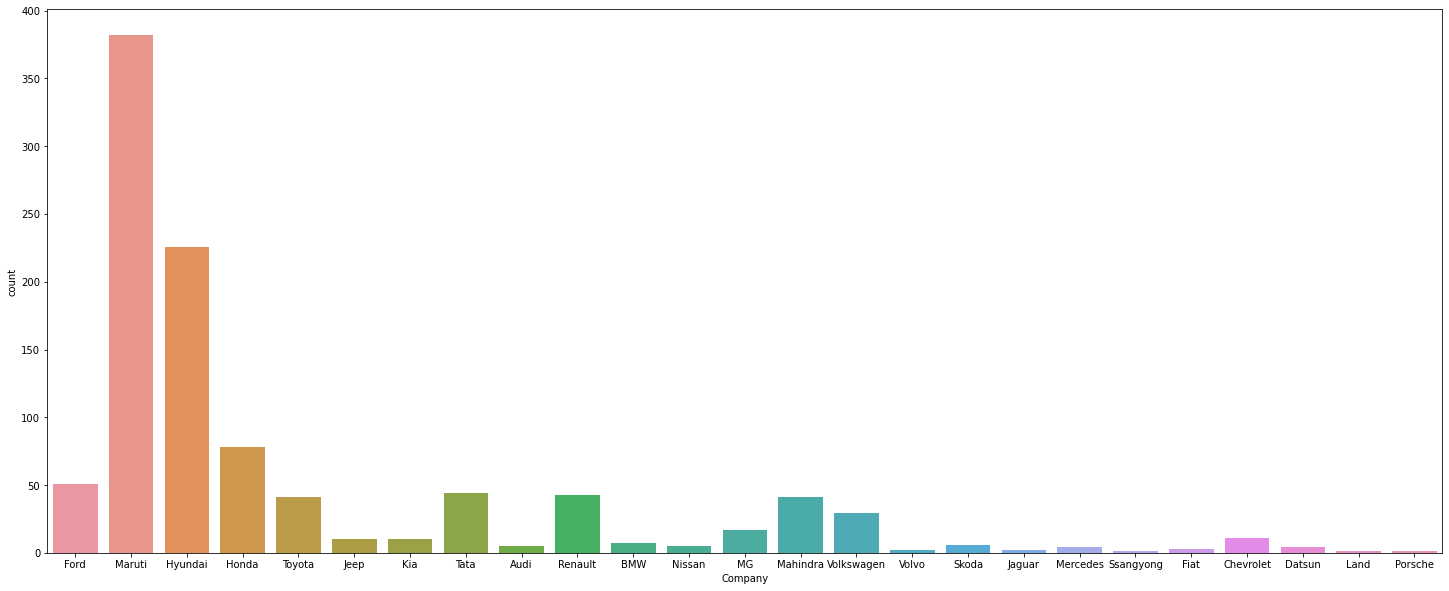

In [50]:
plt.figure(figsize=(25,10))
sns.countplot(x='Company',data=df)  
plt.show()  

# Most sold Car in India is made by Maruti 

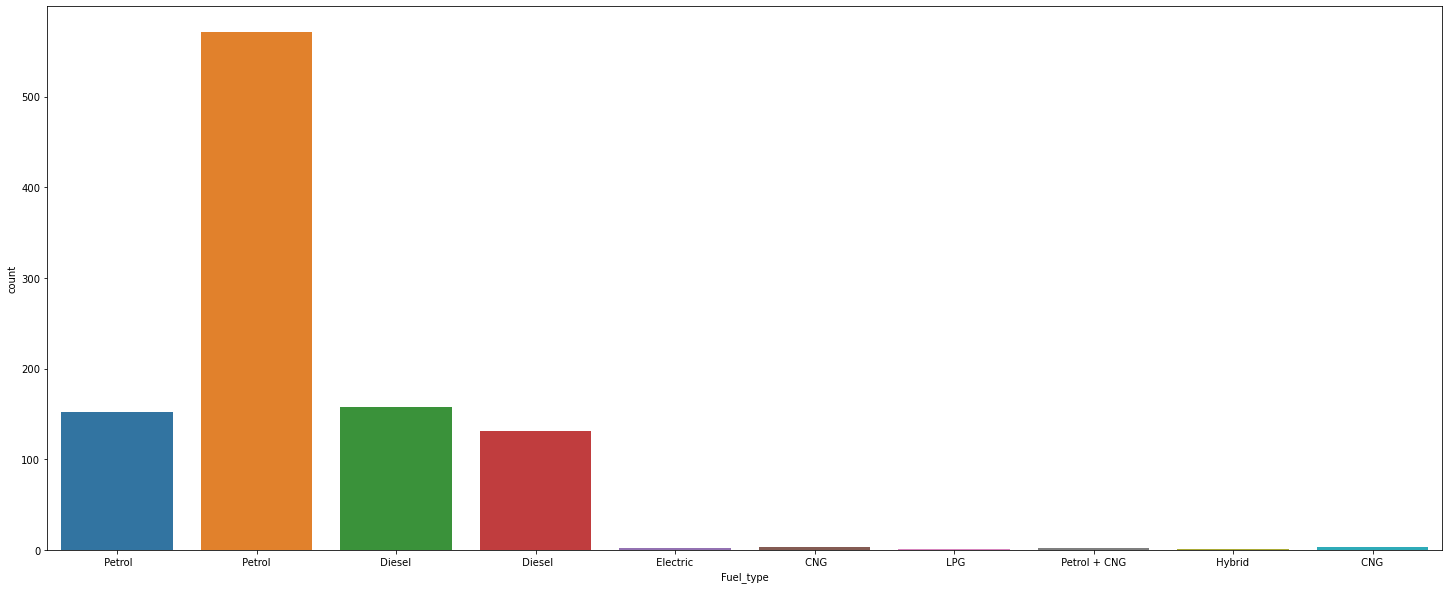

In [51]:
plt.figure(figsize=(25,10))
sns.countplot(x='Fuel_type',data=df)  
plt.show() 

## Fuel type have need "strip()" call cause of unneccesary space in the dataframe

In [52]:
df['Fuel_type'] = df['Fuel_type'].str.strip()

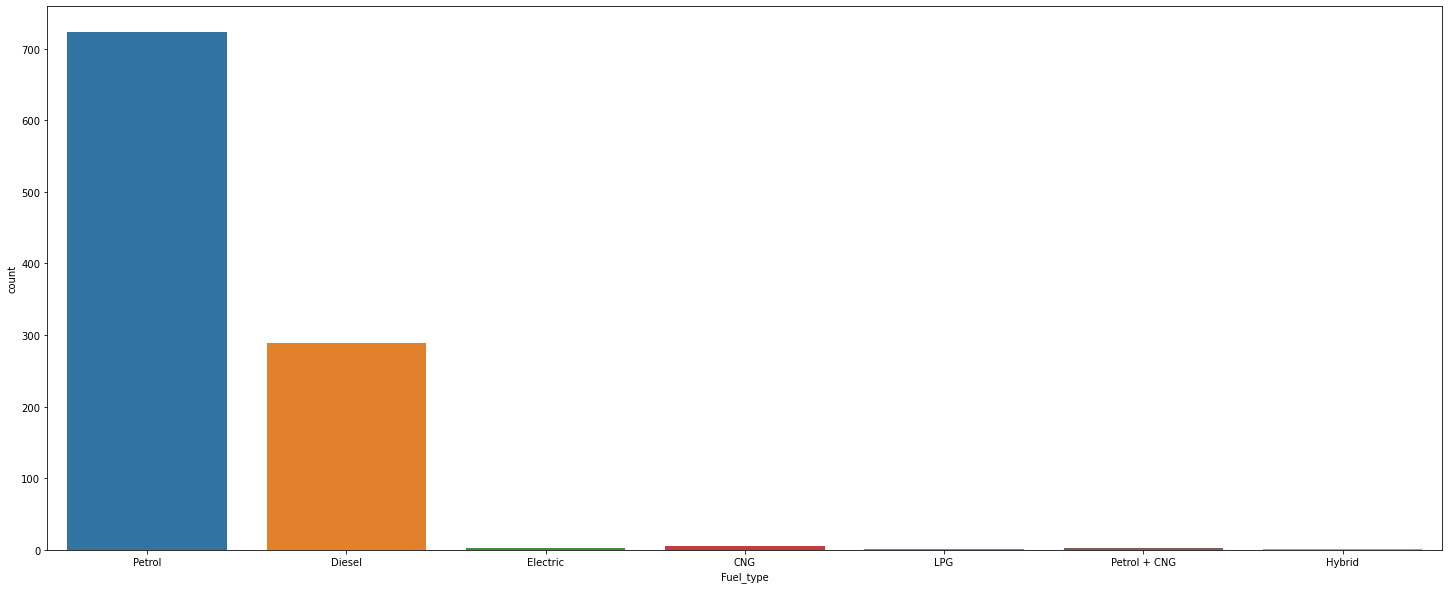

In [53]:
plt.figure(figsize=(25,10))
sns.countplot(x='Fuel_type',data=df)  
plt.show() 

### Most used car does run in "Petrol engine"

## Cars Sold In Each State


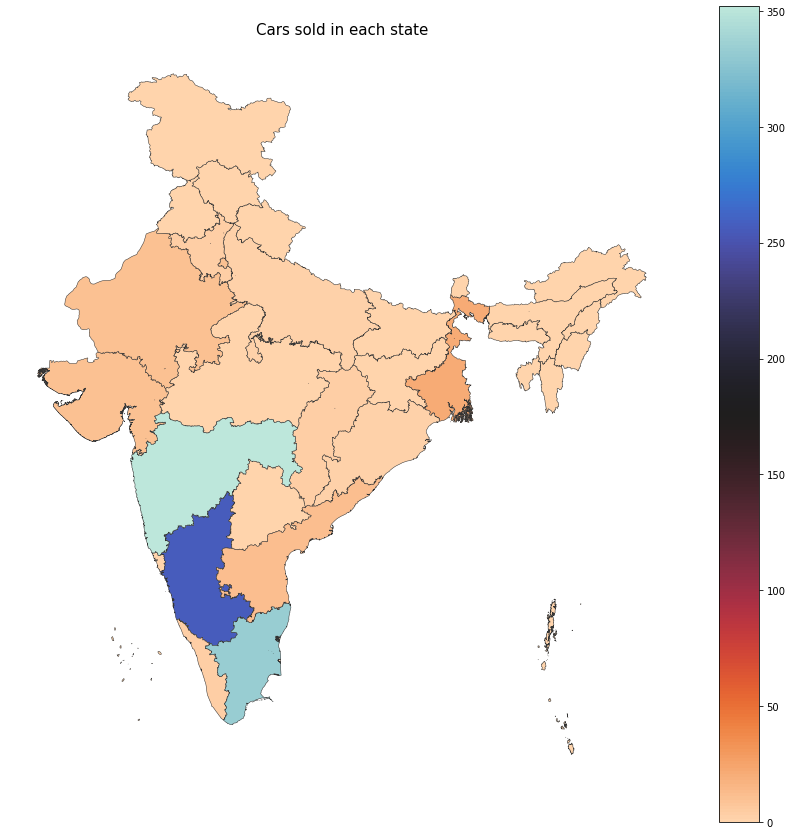

In [54]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Cars sold in each state',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Count', cmap='icefire_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

##### We can see that most cars are bought in the southern part of the country
##### The Top 3 contributors are:
- Karnataka
- Tamil Nadu
- Maharashtra

And since the difference in values is quite high, the others states contribution isn't visible.

In [55]:
df['Label'].unique()

array(['PLATINUM', 'GOLD'], dtype=object)

In [56]:
gold = df[df['Label']=='GOLD']
platinum = df[df['Label']=='PLATINUM']

## Count of individual label cars


Text(0.5, 1.0, 'Count of Cars per Label')

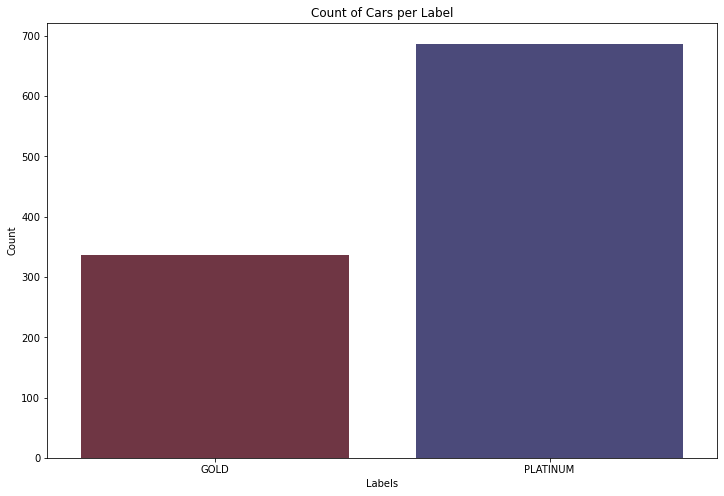

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x=['GOLD','PLATINUM'],y=[len(gold),len(platinum)],palette = 'icefire_r')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Cars per Label')

The count of **Platinum Label Cars** is far more than the **GOLD Label** in our dataset.

## Count of Car Companies

Our dataset also has the Car Company column.
So let's see all the car companies along with their counts.

In [165]:
df1 = df.copy()

In [166]:
df1 = df1.groupby(['Company']).count()
df1 = df1.reset_index()
df1.head(3)

,Company,Name,Label,Location,Price,Kms_driven,Fuel_type,Year
0,Audi,5,5,5,5,5,5,5
1,BMW,7,7,7,7,7,7,7
2,Chevrolet,11,11,11,11,11,11,11


In [167]:
df1 = df1.sort_values(by=['Name','Company'],ascending=False)

## Count of Cars Per Company


Text(0.5, 1.0, 'Count of Cars Per Company')

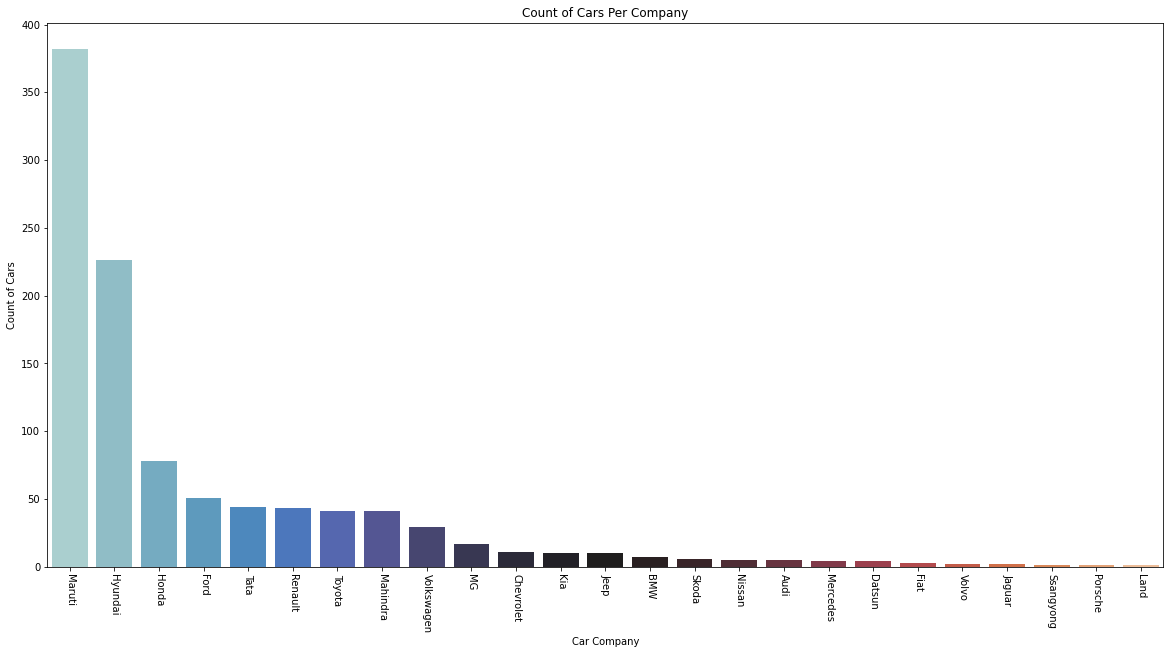

In [168]:
plt.figure(figsize=(20,10))
sns.barplot(x='Company',y='Name',data=df1,palette='icefire')
plt.xlabel('Car Company')
plt.xticks(rotation=-90)
plt.ylabel('Count of Cars')
plt.title('Count of Cars Per Company')

Clearly Maruti is the leader and it is evident from the fact that Maruti alone contributes to **40%** of the Vehicle Supply in India.


Lets see which Company belongs to which label

In [169]:
df2 = df.copy()

## Count of Cars Per Label

Text(0.5, 1.0, 'Count of Cars Per Label')

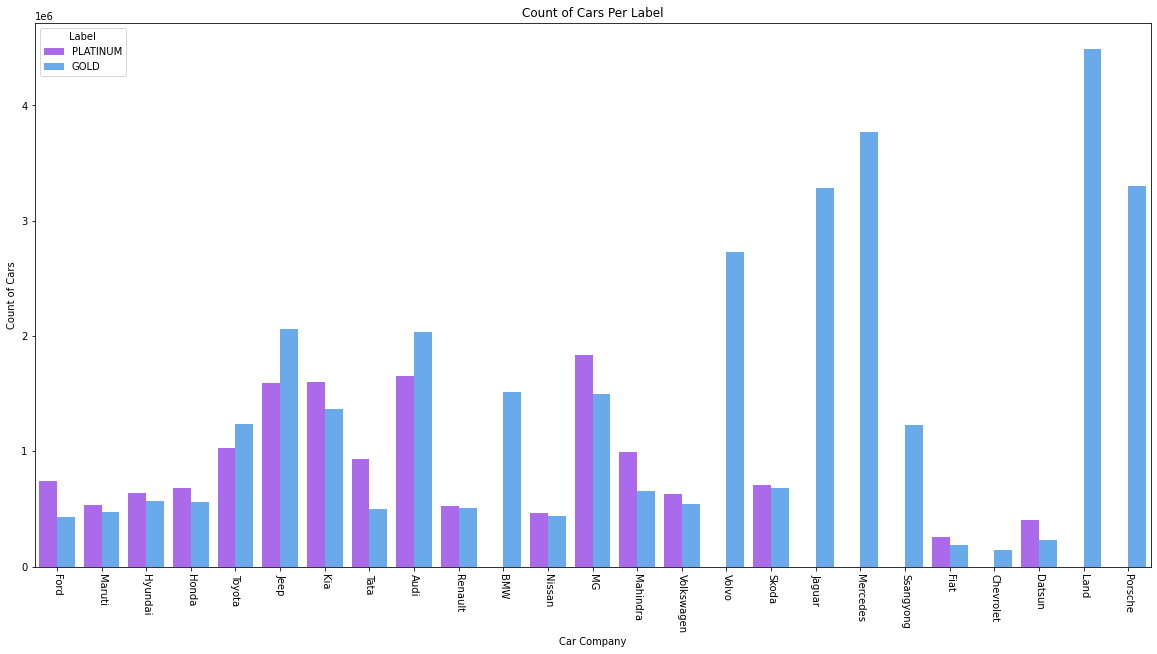

In [170]:
plt.figure(figsize=(20,10))
sns.barplot(x='Company',y='Price',hue='Label',data=df2,ci=None,palette='cool_r')
plt.xlabel('Car Company')
plt.xticks(rotation=-90)
plt.ylabel('Count of Cars')
plt.title('Count of Cars Per Label')

All the sports car brands such as **Jaguar**,**BMW**,**LandRover** and **Porsche** are **Gold Labelled**.

(0.0, 250000.0)

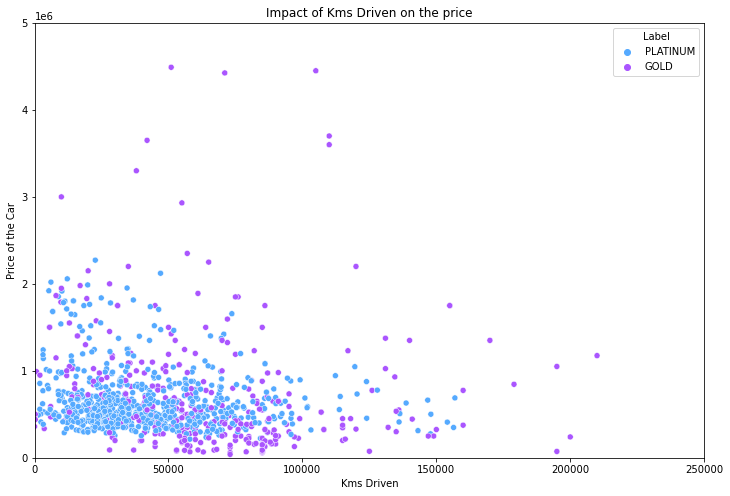

In [171]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='`,data=df, hue='Label', palette = 'cool')
plt.xlabel('Kms Driven')
plt.ylabel('Price of the Car')
plt.title('Impact of Kms Driven on the price')
plt.ylim(0,5000000)
plt.xlim(0,250000)

We can see that the highest priced cars are **GOLD** but other than that, nospecific information can be extracted from this graph.

## Plotting Top10 Cars

In [172]:
df3 = df.copy()
df3.head(10)

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,713499,30988,Petrol,2017,Honda
5,Hyundai i20 - 2013,PLATINUM,Pune,391099,69163,Diesel,2013,Hyundai
6,Maruti Suzuki Swift Dzire VXi 1.2 BS IV - 2015,PLATINUM,Pune,474299,42859,Petrol,2015,Maruti
7,Toyota Corolla Altis VL AT - 2017,PLATINUM,Pune,1252999,34919,Petrol,2017,Toyota
8,Honda Amaze - 2013,PLATINUM,Pune,393699,44940,Petrol,2013,Honda
9,Hyundai Elite i20 Asta 1.2 - 2017,PLATINUM,Pune,730899,13687,Petrol,2017,Hyundai


In [173]:
df3 = df3.sort_values(by='Price',ascending = False)
top10 = df3[:10]

### TOP 10 Highest Priced Cars



Text(0.5, 1.0, 'Top 10 Highest Priced Cars')

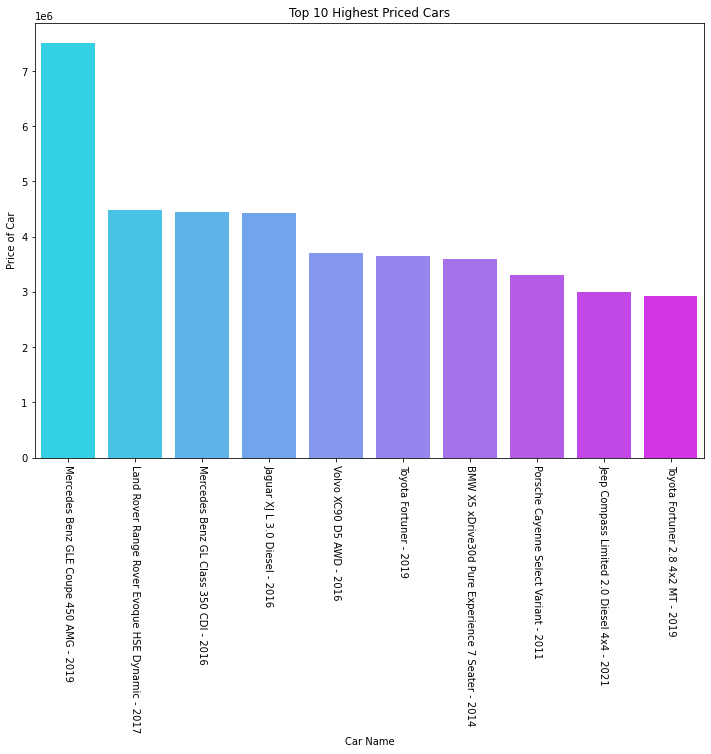

In [174]:
plt.figure(figsize=(12,8))
sns.barplot(x='Name',y='Price',data=top10,palette='cool',ci=None);
plt.xlabel('Car Name')
plt.xticks(rotation=-90)
plt.ylabel('Price of Car')
plt.title('Top 10 Highest Priced Cars')

C:\Users\Rupam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


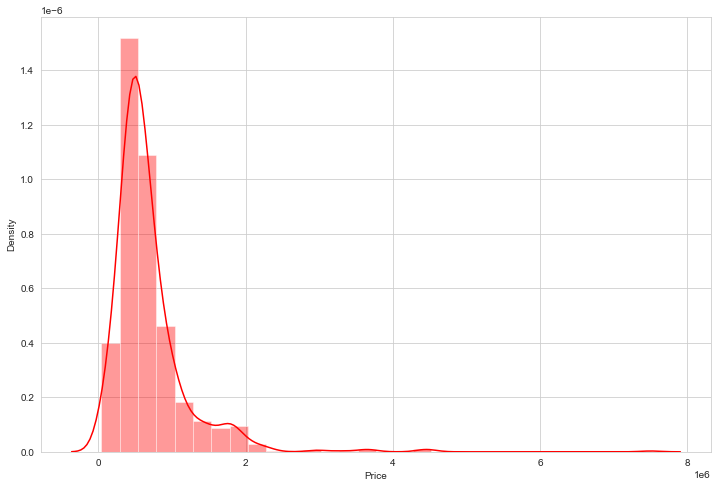

In [188]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(df['Price'], kde = True, color ='red', bins = 30)
plt.show()

<Figure size 1440x720 with 0 Axes>

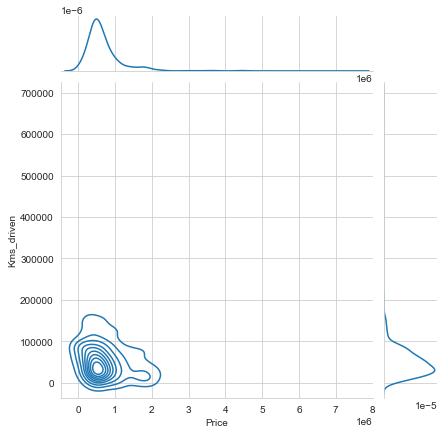

In [58]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.jointplot(x ='Price', y ='Kms_driven', data = df, kind ='kde')
plt.show()